In [3]:
%pwd
%cd ../traditional

C:\Users\wk789\Documents\school\self\ML\traditional


## Logistic Regression

- Model for binary classification
- linear regression model + sigmoid function applied
- learning objective: to find parameter _w_ that minimizes objective function (binary cross entropy) 

In [5]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

In [8]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression

In [9]:
samples = 1000
X, y = make_classification(n_samples=samples,
                           n_features=2,
                           n_informative=2,
                           n_redundant=0, # noise
                           n_clusters_per_class=1)

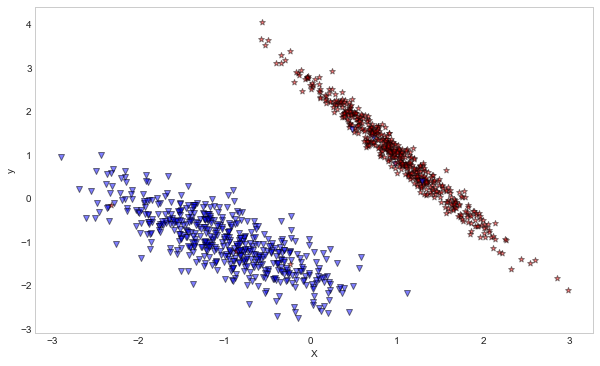

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

ax.grid()
ax.set_xlabel('X')
ax.set_ylabel('y')

for i in range(samples):
    if y[i] == 0:
        ax.scatter(X[i, 0], X[i, 1], 
                   edgecolors='k', alpha=0.5, 
                   marker='*', color='r')
    else:
        ax.scatter(X[i, 0], X[i, 1], 
                   edgecolors='k', alpha=0.5,
                   marker='v', color='b')

plt.show()

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2)

In [15]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [16]:
print(f'training score : {model.score(X_train, y_train)}')
print(f'test score : {model.score(X_test, y_test)}')

training score : 0.9925
test score : 0.995


In [17]:
scores = cross_val_score(model, X, y, scoring='accuracy',
                         cv=10)
print('Average CV score: ', scores.mean())

Average CV score:  0.993


In [18]:
model.intercept_, model.coef_

(array([0.31678914]), array([[-2.74195716, -2.04187462]]))

In [41]:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
z = model.predict(np.c_[xx.ravel(), yy.ravel()])
#xx.shape # (391. 345)

(391, 345)

C:\Users\wk789\Miniconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  This is separate from the ipykernel package so we can avoid doing imports until


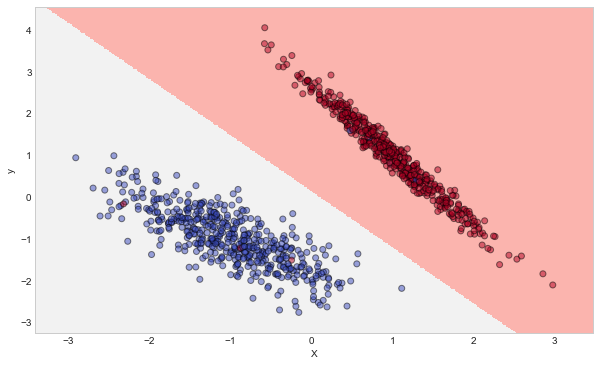

In [44]:
z = z.reshape(xx.shape)
plt.figure(1, figsize=(10, 6))
plt.pcolormesh(xx, yy, z, cmap=plt.cm.Pastel1)

plt.scatter(X[:, 0], X[:, 1], c=np.abs(y-1), 
            edgecolors='k', alpha=0.5, cmap=plt.cm.coolwarm)
plt.xlabel('X')
plt.ylabel('y')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.xticks()
plt.yticks()
plt.show()

### IRIS DATA

In [46]:
from sklearn.datasets import load_iris

iris = load_iris()
print(iris.keys())
print(iris.DESCR)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    peta

In [47]:
import pandas as pd

iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
species = pd.Series(iris.target, dtype='category')
species = species.cat.rename_categories(iris.target_names)

In [48]:
iris_df['species'] = species

In [49]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<AxesSubplot:>

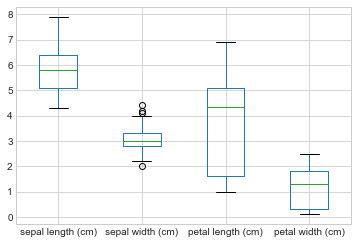

In [58]:
iris_df.boxplot()

<AxesSubplot:>

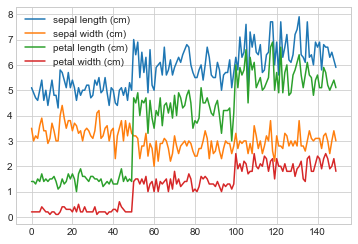

In [59]:
iris_df.plot()

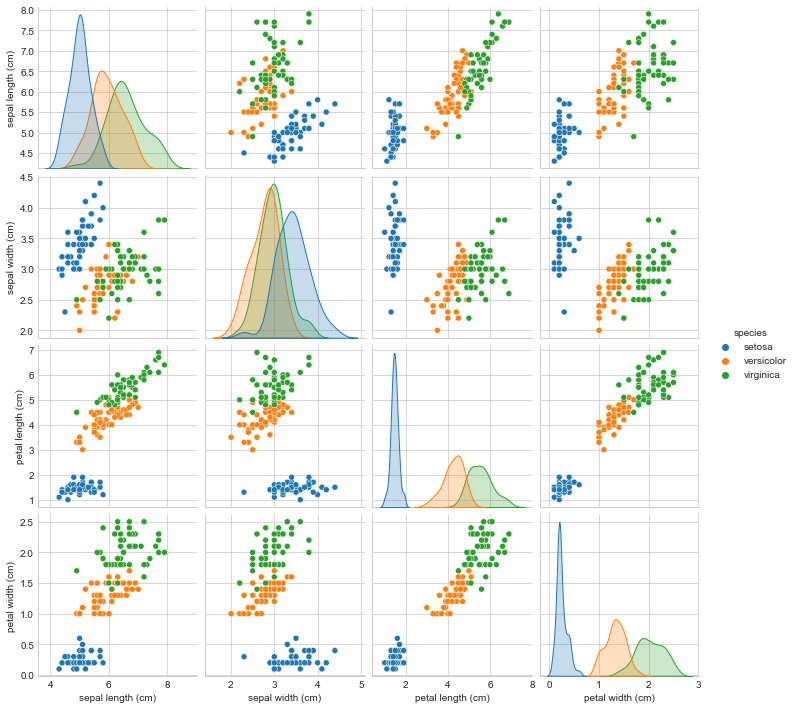

In [62]:
import seaborn as sns

sns.pairplot(iris_df, hue='species')

### Logistic regression of iris data

In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris.data[:, [2, 3]], iris.target, 
                                                    test_size=0.2, random_state=1, stratify=iris.target) # stratify: useful for hirarchical data


In [64]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs', multi_class='auto',
                           C=100.0, random_state=1)
model.fit(X_train, y_train)

LogisticRegression(C=100.0, random_state=1)

In [65]:
print(f'training score : {model.score(X_train, y_train)}')
print(f'test score : {model.score(X_test, y_test)}')

training score : 0.9666666666666667
test score : 0.9666666666666667


In [124]:
import numpy as np
X = np.vstack((X_train, X_test))
y = np.hstack((y_train, y_test))

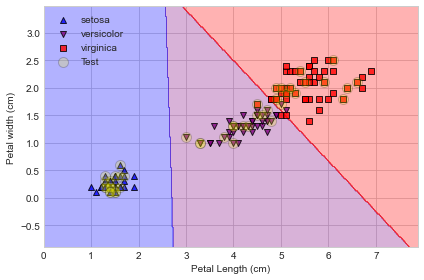

In [134]:
from matplotlib.colors import ListedColormap

x1_min, x1_max = X[:, 0].min()-1, X[:, 0].max()+1
x2_min, x2_max = X[:, 1].min()-1, X[:, 1].max()+1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                       np.arange(x2_min, x2_max, 0.02))

z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
z = z.reshape(xx1.shape)

species = list(iris_df.species.unique())
markers = ('^', 'v', 's')
colors = ('blue', 'purple', 'red')
cmap = ListedColormap(colors[:len(np.unique(y))])
plt.contourf(xx1, xx2, z, 
             alpha=0.3, cmap=cmap)
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())

for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y==cl, 0],
                y=X[y==cl, 1],
                alpha=0.8,
                c=colors[idx],
                marker=markers[idx],
                label=species[cl],
                edgecolor='k')
    
X_comb_test, y_comb_test = X[range(105, 150), :], y[range(105, 150)]
plt.scatter(X_comb_test[:, 0], X_comb_test[:, 1],
            c='yellow', edgecolor='k', 
            alpha=0.2, linewidth=1, marker='o',
            s=100, label='Test')

plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal width (cm)')
plt.legend(loc='upper left')
plt.tight_layout()

In [137]:
import multiprocessing
from sklearn.model_selection import GridSearchCV

param_grid = [{'penalty': ['l2', 'l2'],
               'C': [2.0, 2.2, 2.4, 2.6, 2.8]}]

gs = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid,
                  scoring='accuracy', cv=10, n_jobs=multiprocessing.cpu_count())

gs

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=8,
             param_grid=[{'C': [2.0, 2.2, 2.4, 2.6, 2.8],
                          'penalty': ['l2', 'l2']}],
             scoring='accuracy')

In [138]:
result = gs.fit(iris.data, iris.target)

C:\Users\wk789\Miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [142]:
print(gs.best_estimator_)
print(f'Optimized score: {gs.best_score_}')
print(f'Best parameter: {gs.best_params_}')

pd.DataFrame(result.cv_results_)

LogisticRegression(C=2.4)
Optimized score: 0.9800000000000001
Best parameter: {'C': 2.4, 'penalty': 'l2'}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.052855,0.015668,0.000501,0.000922,2.0,l2,"{'C': 2.0, 'penalty': 'l2'}",1.0,0.933333,1.0,1.0,0.933333,0.933333,0.933333,1.0,1.0,1.0,0.973333,0.032660,7
1,0.027706,0.005179,0.000800,0.000748,2.0,l2,"{'C': 2.0, 'penalty': 'l2'}",1.0,0.933333,1.0,1.0,0.933333,0.933333,0.933333,1.0,1.0,1.0,0.973333,0.032660,7
2,0.029507,0.006283,0.000300,0.000458,2.2,l2,"{'C': 2.2, 'penalty': 'l2'}",1.0,0.933333,1.0,1.0,0.933333,0.933333,0.933333,1.0,1.0,1.0,0.973333,0.032660,7
3,0.028306,0.005062,0.000500,0.000671,2.2,l2,"{'C': 2.2, 'penalty': 'l2'}",1.0,0.933333,1.0,1.0,0.933333,0.933333,0.933333,1.0,1.0,1.0,0.973333,0.032660,7
4,0.030307,0.004361,0.000600,0.000663,2.4,l2,"{'C': 2.4, 'penalty': 'l2'}",1.0,0.933333,1.0,1.0,0.933333,1.000000,0.933333,1.0,1.0,1.0,0.980000,0.030551,1
5,0.029206,0.003221,0.000601,0.000490,2.4,l2,"{'C': 2.4, 'penalty': 'l2'}",1.0,0.933333,1.0,1.0,0.933333,1.000000,0.933333,1.0,1.0,1.0,0.980000,0.030551,1
6,0.039009,0.014321,0.000601,0.000490,2.6,l2,"{'C': 2.6, 'penalty': 'l2'}",1.0,0.933333,1.0,1.0,0.933333,1.000000,0.933333,1.0,1.0,1.0,0.980000,0.030551,1
7,0.042011,0.011673,0.000699,0.000640,2.6,l2,"{'C': 2.6, 'penalty': 'l2'}",1.0,0.933333,1.0,1.0,0.933333,1.000000,0.933333,1.0,1.0,1.0,0.980000,0.030551,1
8,0.033908,0.007517,0.000500,0.000500,2.8,l2,"{'C': 2.8, 'penalty': 'l2'}",1.0,0.933333,1.0,1.0,0.933333,1.000000,0.933333,1.0,1.0,1.0,0.980000,0.030551,1
9,0.026904,0.005414,0.000500,0.000500,2.8,l2,"{'C': 2.8, 'penalty': 'l2'}",1.0,0.933333,1.0,1.0,0.933333,1.000000,0.933333,1.0,1.0,1.0,0.980000,0.030551,1


### Breast cancer dataset

In [143]:
from sklearn.datasets import load_breast_cancer

In [147]:
cancer = load_breast_cancer()
print(cancer.keys())
print(cancer.DESCR)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these 

In [148]:
cancer_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
cancer_df['Target'] = cancer.target
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


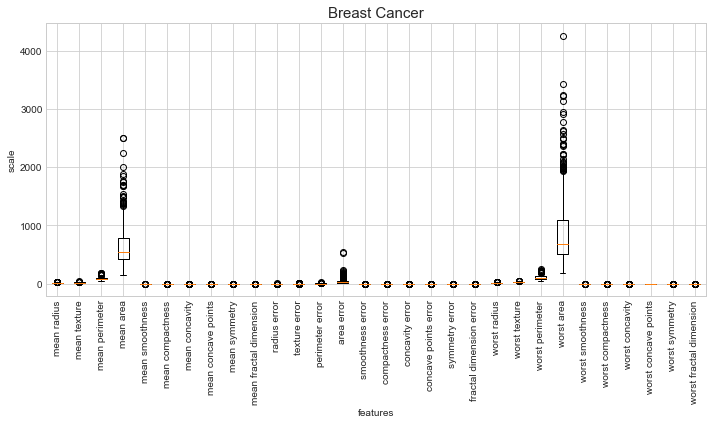

In [150]:
fig = plt.figure(figsize=[10, 6])
plt.title('Breast Cancer', fontsize=15)
plt.boxplot(cancer.data)
plt.xticks(np.arange(30)+1, cancer.feature_names, rotation=90)
plt.xlabel('features')
plt.ylabel('scale')
plt.tight_layout()

In [151]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [152]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [165]:
model = LogisticRegression(max_iter=2000, C=3.0)
model.fit(X_train, y_train)

C:\Users\wk789\Miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(C=3.0, max_iter=2000)

In [166]:
print(f'training score : {model.score(X_train, y_train)}')
print(f'test score : {model.score(X_test, y_test)}')

training score : 0.9741784037558685
test score : 0.9300699300699301


In [158]:
import multiprocessing
from sklearn.model_selection import GridSearchCV

param_grid = [{'penalty': ['l2', 'l2'],
               'C': [2.0, 2.2, 2.4, 2.6, 2.8, 3.0]}]

gs = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid,
                  scoring='accuracy', cv=10, n_jobs=multiprocessing.cpu_count())

result = gs.fit(cancer.data, cancer.target)

C:\Users\wk789\Miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [162]:
print(gs.best_estimator_)
print(f'Optimized score: {gs.best_score_}')
print(f'Best parameter: {gs.best_params_}')

pd.DataFrame(result.cv_results_)

LogisticRegression(C=3.0)
Optimized score: 0.9473057644110275
Best parameter: {'C': 3.0, 'penalty': 'l2'}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.022405,0.000916,0.0004,0.000490,2.0,l2,"{'C': 2.0, 'penalty': 'l2'}",0.929825,0.929825,0.929825,0.929825,0.964912,0.982456,0.929825,0.947368,0.929825,0.964286,0.943797,0.018826,3
1,0.026706,0.004777,0.0006,0.000490,2.0,l2,"{'C': 2.0, 'penalty': 'l2'}",0.929825,0.929825,0.929825,0.929825,0.964912,0.982456,0.929825,0.947368,0.929825,0.964286,0.943797,0.018826,3
2,0.024706,0.002411,0.0007,0.000641,2.2,l2,"{'C': 2.2, 'penalty': 'l2'}",0.929825,0.929825,0.947368,0.929825,0.982456,0.964912,0.929825,0.929825,0.929825,0.964286,0.943797,0.018826,3
3,0.026306,0.003288,0.0003,0.000458,2.2,l2,"{'C': 2.2, 'penalty': 'l2'}",0.929825,0.929825,0.947368,0.929825,0.982456,0.964912,0.929825,0.929825,0.929825,0.964286,0.943797,0.018826,3
4,0.027806,0.006883,0.0002,0.000400,2.4,l2,"{'C': 2.4, 'penalty': 'l2'}",0.929825,0.929825,0.947368,0.929825,0.964912,0.964912,0.929825,0.947368,0.929825,0.928571,0.940226,0.014134,11
5,0.025905,0.004722,0.0005,0.000500,2.4,l2,"{'C': 2.4, 'penalty': 'l2'}",0.929825,0.929825,0.947368,0.929825,0.964912,0.964912,0.929825,0.947368,0.929825,0.928571,0.940226,0.014134,11
6,0.025205,0.004262,0.0005,0.000500,2.6,l2,"{'C': 2.6, 'penalty': 'l2'}",0.964912,0.929825,0.947368,0.929825,0.947368,0.947368,0.929825,0.947368,0.929825,0.964286,0.943797,0.013029,3
7,0.026606,0.004341,0.0007,0.000458,2.6,l2,"{'C': 2.6, 'penalty': 'l2'}",0.964912,0.929825,0.947368,0.929825,0.947368,0.947368,0.929825,0.947368,0.929825,0.964286,0.943797,0.013029,3
8,0.026706,0.004407,0.0007,0.000458,2.8,l2,"{'C': 2.8, 'penalty': 'l2'}",0.947368,0.929825,0.929825,0.929825,0.964912,0.964912,0.912281,0.947368,0.929825,0.964286,0.942043,0.017551,9
9,0.026906,0.004636,0.0006,0.000917,2.8,l2,"{'C': 2.8, 'penalty': 'l2'}",0.947368,0.929825,0.929825,0.929825,0.964912,0.964912,0.912281,0.947368,0.929825,0.964286,0.942043,0.017551,9


### Stochastic Gradient Descent

- scikit-learn - linear SGD & SGD classification

In [178]:
# linear regression using SGD
from sklearn.linear_model import SGDRegressor
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [179]:
X ,y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)

C:\Users\wk789\Miniconda3\envs\ml\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing 

In [180]:
model = make_pipeline(StandardScaler(), SGDRegressor(loss='squared_error'))
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])

In [181]:
print(f'training score: {model.score(X_train, y_train)}')
print(f'test score: {model.score(X_test, y_test)}')

training score: 0.7272812348478872
test score: 0.7725310526903926


In [182]:
# SGD Classification on iris data
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [183]:
X ,y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [184]:
model = make_pipeline(StandardScaler(), SGDClassifier(loss='log'))
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier(loss='log'))])

In [185]:
print(f'training score: {model.score(X_train, y_train)}')
print(f'test score: {model.score(X_test, y_test)}')

training score: 0.9732142857142857
test score: 0.9736842105263158


In [186]:
# SGD Classification on breast cancer data

X ,y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [187]:
model = make_pipeline(StandardScaler(), SGDClassifier(loss='log'))
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier(loss='log'))])

In [188]:
print(f'training score: {model.score(X_train, y_train)}')
print(f'test score: {model.score(X_test, y_test)}')

training score: 0.9765258215962441
test score: 0.9440559440559441
